In [2]:
# Import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mplfinance as mpf
import plotly.graph_objects as go
import pandas as pd
import cv2
import matplotlib.image as mpimg

In [3]:
# Read the data of ADA USDT
adausdt = pd.read_csv("data/adausdt.csv")

# Check the data
adausdt.head(5)

,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,LogReturns
0,1609459200000,0.18134,0.18146,0.17831,0.18051,19194919.1,1609462799999,3.447726e+06,5472,9753882.0,1.752001e+06,0.000000
1,1609462800000,0.18055,0.18469,0.18000,0.18358,28601648.4,1609466399999,5.222490e+06,11417,15629558.8,2.855128e+06,0.016864
2,1609466400000,0.18361,0.18473,0.18229,0.18368,20075571.1,1609469999999,3.692176e+06,6751,10958611.4,2.016056e+06,0.000545
3,1609470000000,0.18375,0.18458,0.18259,0.18292,15704497.1,1609473599999,2.886688e+06,5212,8379022.4,1.540624e+06,-0.004146
4,1609473600000,0.18299,0.18367,0.18105,0.18180,16338316.2,1609477199999,2.981119e+06,6630,7767811.4,1.417107e+06,-0.006142


In [4]:
# Check the data shape
adausdt.shape

(33561, 12)

In [5]:
# Print the list of columns
adausdt.columns.tolist()

['Open time',
 'Open',
 'High',
 'Low',
 'Close',
 'Volume',
 'Close time',
 'Quote asset volume',
 'Number of trades',
 'Taker buy base asset volume',
 'Taker buy quote asset volume',
 'LogReturns']

In [6]:
# Delete unnecessary columns
adausdt_important = adausdt.drop(["Open time", "Close time", "Number of trades", "Taker buy base asset volume", 'Taker buy quote asset volume', "Quote asset volume"], axis = 1)
adausdt_important

,Open,High,Low,Close,Volume,LogReturns
0,0.18134,0.18146,0.17831,0.18051,19194919.1,0.000000
1,0.18055,0.18469,0.18000,0.18358,28601648.4,0.016864
2,0.18361,0.18473,0.18229,0.18368,20075571.1,0.000545
3,0.18375,0.18458,0.18259,0.18292,15704497.1,-0.004146
4,0.18299,0.18367,0.18105,0.18180,16338316.2,-0.006142
...,...,...,...,...,...,...
33556,0.34300,0.34390,0.34070,0.34090,1916966.8,-0.005850
33557,0.34100,0.34360,0.34030,0.34260,3854815.8,0.004974
33558,0.34270,0.34410,0.34160,0.34300,1874078.1,0.001167
33559,0.34290,0.34340,0.34070,0.34270,3501896.0,-0.000875


In [7]:
# Create a sample image
df_slice = adausdt_important[0: 24]
df_slice

,Open,High,Low,Close,Volume,LogReturns
0,0.18134,0.18146,0.17831,0.18051,19194919.1,0.000000
1,0.18055,0.18469,0.18000,0.18358,28601648.4,0.016864
2,0.18361,0.18473,0.18229,0.18368,20075571.1,0.000545
3,0.18375,0.18458,0.18259,0.18292,15704497.1,-0.004146
4,0.18299,0.18367,0.18105,0.18180,16338316.2,-0.006142
5,0.18182,0.18339,0.18171,0.18297,9273656.6,0.006415
6,0.18299,0.18319,0.17921,0.18100,15597889.8,-0.010825
7,0.18103,0.18109,0.17800,0.17955,21515641.6,-0.008043
8,0.17955,0.18007,0.17673,0.17762,23376105.6,-0.010807
9,0.17766,0.17962,0.17718,0.17904,10212369.8,0.007963


In [8]:
# Plot a sample image
# Create a data range for the x-axis
df_slice["Date"] = pd.date_range(start = '2023-01-01', periods = 24, freq = 'H')
df_slice

/var/folders/pl/z1lfm5xs7299k23shpwd6ngh0000gp/T/ipykernel_10653/1433488590.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_slice["Date"] = pd.date_range(start = '2023-01-01', periods = 24, freq = 'H')
/var/folders/pl/z1lfm5xs7299k23shpwd6ngh0000gp/T/ipykernel_10653/1433488590.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_slice["Date"] = pd.date_range(start = '2023-01-01', periods = 24, freq = 'H')


,Open,High,Low,Close,Volume,LogReturns,Date
0,0.18134,0.18146,0.17831,0.18051,19194919.1,0.000000,2023-01-01 00:00:00
1,0.18055,0.18469,0.18000,0.18358,28601648.4,0.016864,2023-01-01 01:00:00
2,0.18361,0.18473,0.18229,0.18368,20075571.1,0.000545,2023-01-01 02:00:00
3,0.18375,0.18458,0.18259,0.18292,15704497.1,-0.004146,2023-01-01 03:00:00
4,0.18299,0.18367,0.18105,0.18180,16338316.2,-0.006142,2023-01-01 04:00:00
5,0.18182,0.18339,0.18171,0.18297,9273656.6,0.006415,2023-01-01 05:00:00
6,0.18299,0.18319,0.17921,0.18100,15597889.8,-0.010825,2023-01-01 06:00:00
7,0.18103,0.18109,0.17800,0.17955,21515641.6,-0.008043,2023-01-01 07:00:00
8,0.17955,0.18007,0.17673,0.17762,23376105.6,-0.010807,2023-01-01 08:00:00
9,0.17766,0.17962,0.17718,0.17904,10212369.8,0.007963,2023-01-01 09:00:00


In [205]:
# Create a figure
fig = go.Figure()

# Add the OHLC bar
fig.add_trace(go.Ohlc(x = df_slice["Date"], open = df_slice["Open"],
                      high = df_slice["High"], low = df_slice["Low"],
                      close = df_slice["Close"], name = "OHLC",
                      yaxis = "y", increasing_line_color = "white", decreasing_line_color = "white", line=dict(width = 1)))

# # Add the volume bar
# fig.add_trace(go.Bar(x = df_slice["Date"], y = df_slice["Volume"], yaxis = "y2", name = "Volume", marker = dict(color = "white")))
# fig.add_trace(go.Scatter(
#     x=df_slice["Date"],
#     y=df_slice["Open"],
#     mode='markers',
#     marker=dict(color='white', size=1),  # Larger white markers for open
#     name='Open'
# ))

fig.update_layout(
    paper_bgcolor='black',
    plot_bgcolor='black',
    xaxis_rangeslider_visible = False,
    xaxis = {
    "showticklabels": False,
    "ticks": "",
    "type": "date",
    "gridcolor": "black"
    },
    yaxis = {
        # 'domain': [0.2, 1],
        'range': [min(df_slice["Low"].min(), df_slice["Open"].min(), 
                       df_slice["Close"].min()), 
                      max(df_slice["High"].max(), df_slice["Open"].max(), 
                        df_slice["Close"].max())],
        'visible': False,
        "gridcolor": "black"
    },
    # yaxis2 = dict(domain = [0, 0.2], visible = False),
    width = 40, # REMEMBER TO CHANGE TO 60
    height = 48, # REMEMBER TO CHANGE TO 64
    showlegend = False,
    margin = dict(l = 0, r = 0, t = 0, b = 0)
)

# Show the figure
fig.show()

In [217]:
# Export the image
file_name = f"sample_image.jpeg"
fig.write_image(file_name)

# Load the image
img = mpimg.imread("sample_image.jpeg")

img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
# Change it to grayscale image
processedImg = img > 114
processedImg = processedImg.astype(np.uint8) * 255

print(processedImg.shape)



(48, 40)


True

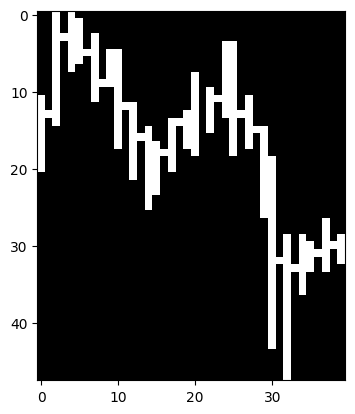

In [219]:
# Display the image
plt.figure()
plt.imshow(processedImg, cmap = "gray")

cv2.imwrite("sample_image.jpeg", processedImg)

In [221]:
img = mpimg.imread("sample_image.jpeg")
print(img.shape)

(48, 40)
